In [2]:
import pandas as pd
from scipy import stats 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm 
import seaborn as sns 

In [3]:
auto=pd.read_csv("C:/Users/sudarson.SUDARSON/Downloads/auto-mpg.data",delim_whitespace=True,header=None,na_values='?')
auto.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [4]:
auto.describe()

,0,1,2,3,4,5,6,7
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
auto.shape

(398, 9)

In [6]:
auto.columns=["mpg","cylinder","disp","hpow","weight","acc","modyear","origin","names"]

In [7]:
auto.head()

,mpg,cylinder,disp,hpow,weight,acc,modyear,origin,names
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


{'whiskers': [<matplotlib.lines.Line2D at 0x1bfdb7def40>,
 'caps': [<matplotlib.lines.Line2D at 0x1bfdb7f95e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bfdb7deaf0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bfdb7f9d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bfdb8020d0>],
 'means': []}

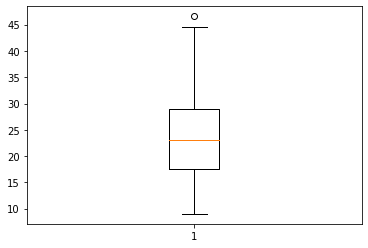

In [8]:
plt.boxplot(auto.mpg)

C:\Users\sudarson.SUDARSON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hpow'>

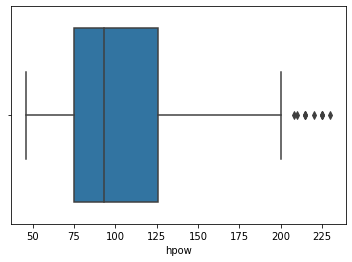

In [9]:
sns.boxplot(auto.hpow)

(array([ 27.,  95., 120.,  44.,  19.,  47.,  13.,  14.,   5.,   8.]),
 array([ 46. ,  64.4,  82.8, 101.2, 119.6, 138. , 156.4, 174.8, 193.2,
        211.6, 230. ]),
 <BarContainer object of 10 artists>)

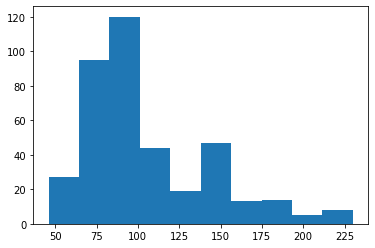

In [10]:
plt.hist(auto.hpow)

In [11]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cylinder  398 non-null    int64  
 2   disp      398 non-null    float64
 3   hpow      392 non-null    float64
 4   weight    398 non-null    float64
 5   acc       398 non-null    float64
 6   modyear   398 non-null    int64  
 7   origin    398 non-null    int64  
 8   names     398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [12]:
auto.hpow.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [13]:
hpow=auto.hpow

In [14]:
hpow.fillna(hpow.median(),inplace=True)

In [15]:
auto.hpow.unique()

array([130. , 165. , 150. , 140. , 198. , 220. , 215. , 225. , 190. ,
       170. , 160. ,  95. ,  97. ,  85. ,  88. ,  46. ,  87. ,  90. ,
       113. , 200. , 210. , 193. ,  93.5, 100. , 105. , 175. , 153. ,
       180. , 110. ,  72. ,  86. ,  70. ,  76. ,  65. ,  69. ,  60. ,
        80. ,  54. , 208. , 155. , 112. ,  92. , 145. , 137. , 158. ,
       167. ,  94. , 107. , 230. ,  49. ,  75. ,  91. , 122. ,  67. ,
        83. ,  78. ,  52. ,  61. ,  93. , 148. , 129. ,  96. ,  71. ,
        98. , 115. ,  53. ,  81. ,  79. , 120. , 152. , 102. , 108. ,
        68. ,  58. , 149. ,  89. ,  63. ,  48. ,  66. , 139. , 103. ,
       125. , 133. , 138. , 135. , 142. ,  77. ,  62. , 132. ,  84. ,
        64. ,  74. , 116. ,  82. ])

In [16]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cylinder  398 non-null    int64  
 2   disp      398 non-null    float64
 3   hpow      398 non-null    float64
 4   weight    398 non-null    float64
 5   acc       398 non-null    float64
 6   modyear   398 non-null    int64  
 7   origin    398 non-null    int64  
 8   names     398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [17]:
cylinder=auto.cylinder

C:\Users\sudarson.SUDARSON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cylinder'>

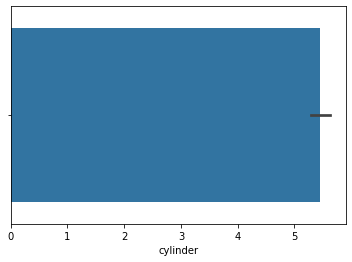

In [18]:
sns.barplot(cylinder)

<AxesSubplot:>

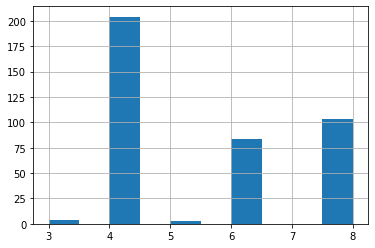

In [19]:
auto.cylinder.hist()

<AxesSubplot:xlabel='cylinder', ylabel='count'>

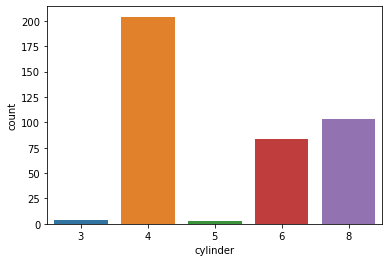

In [20]:
sns.countplot(x='cylinder',data=auto)
# sns.count = univariant 

In [21]:
auto.cylinder=auto.cylinder.replace(3,4)
auto.cylinder=auto.cylinder.replace(5,4)

In [22]:
auto.cylinder=auto.cylinder.replace(4,"between 3- 5")

<AxesSubplot:xlabel='cylinder', ylabel='count'>

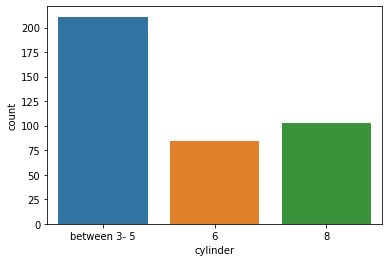

In [23]:
sns.countplot(x=auto.cylinder,order=['between 3- 5',6,8])

In [24]:
stats.shapiro(auto.disp)

ShapiroResult(statistic=0.8804193139076233, pvalue=5.1434173206608516e-17)

ShapiroResult(statistic=0.9413594603538513, pvalue=1.9702153103429154e-11)

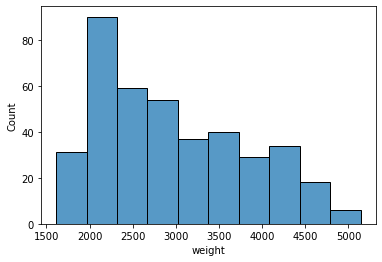

In [25]:
sns.histplot(auto.weight)
stats.shapiro(auto.weight)

ShapiroResult(statistic=0.9923787713050842, pvalue=0.039872437715530396)

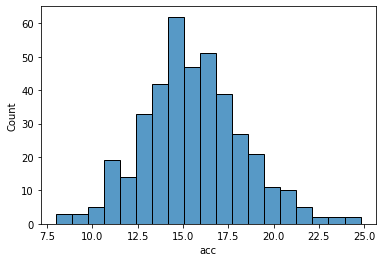

In [26]:
sns.histplot(auto.acc)
stats.shapiro(auto.acc)

C:\Users\sudarson.SUDARSON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ShapiroResult(statistic=0.9923787713050842, pvalue=0.039872437715530396)

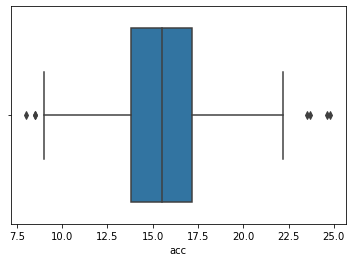

In [27]:
sns.boxplot(auto.acc)
stats.shapiro(auto.acc)

{'whiskers': [<matplotlib.lines.Line2D at 0x1bfe1476ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x1bfe1484220>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bfe1476730>],
 'medians': [<matplotlib.lines.Line2D at 0x1bfe1484940>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bfe1484cd0>],
 'means': []}

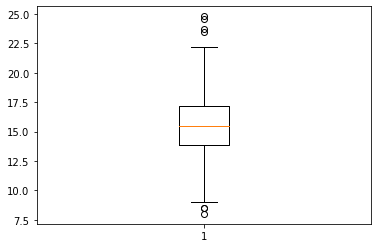

In [28]:
plt.boxplot(auto.acc)

ShapiroResult(statistic=0.6739088296890259, pvalue=5.797658882025973e-27)

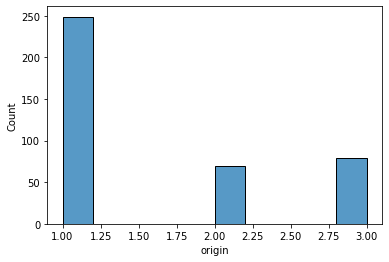

In [29]:
sns.histplot(auto.origin)
stats.shapiro(auto.origin)

In [30]:
auto.modyear.shape

(398,)

In [31]:
auto.modyear.unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [32]:
len(auto.modyear.unique())

13

In [33]:
# one way annova 
stats.f_oneway(auto.mpg[auto.cylinder=="between 3- 5"],auto.mpg[auto.cylinder==6],auto.mpg[auto.cylinder==8])

F_onewayResult(statistic=328.4941105950235, pvalue=9.567052215635294e-85)

In [34]:
a1=auto.mpg[auto.modyear==70]
a2=auto.mpg[auto.modyear==71]
a3=auto.mpg[auto.modyear==72]
a4=auto.mpg[auto.modyear==73]
a5=auto.mpg[auto.modyear==74]
a6=auto.mpg[auto.modyear==75]
a7=auto.mpg[auto.modyear==76]
a8=auto.mpg[auto.modyear==77]
a9=auto.mpg[auto.modyear==78]
a10=auto.mpg[auto.modyear==79]
a11=auto.mpg[auto.modyear==80]
a12=auto.mpg[auto.modyear==81]
a13=auto.mpg[auto.modyear==82]

In [35]:
stats.f_oneway(a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13)

F_onewayResult(statistic=24.094207236196738, pvalue=5.2640168845192595e-40)

In [36]:
stats.f_oneway(auto.mpg[auto.origin==1],auto.mpg[auto.origin==3],auto.mpg[auto.origin==2])

F_onewayResult(statistic=98.54179491075871, pvalue=1.9154864184128e-35)

In [37]:
auto.head()

,mpg,cylinder,disp,hpow,weight,acc,modyear,origin,names
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [38]:
data=auto.drop(["names","origin","modyear","cylinder",],axis=1,inplace=True)

In [39]:
auto.head()

,mpg,disp,hpow,weight,acc
0,18.0,307.0,130.0,3504.0,12.0
1,15.0,350.0,165.0,3693.0,11.5
2,18.0,318.0,150.0,3436.0,11.0
3,16.0,304.0,150.0,3433.0,12.0
4,17.0,302.0,140.0,3449.0,10.5


In [40]:
trained=auto.iloc[:318]
trained

,mpg,disp,hpow,weight,acc
0,18.0,307.0,130.0,3504.0,12.0
1,15.0,350.0,165.0,3693.0,11.5
2,18.0,318.0,150.0,3436.0,11.0
3,16.0,304.0,150.0,3433.0,12.0
4,17.0,302.0,140.0,3449.0,10.5
...,...,...,...,...,...
313,28.0,151.0,90.0,2678.0,16.5
314,26.4,140.0,88.0,2870.0,18.1
315,24.3,151.0,90.0,3003.0,20.1
316,19.1,225.0,90.0,3381.0,18.7


In [41]:
test=auto.iloc[318:]
test

,mpg,disp,hpow,weight,acc
318,29.8,134.0,90.0,2711.0,15.5
319,31.3,120.0,75.0,2542.0,17.5
320,37.0,119.0,92.0,2434.0,15.0
321,32.2,108.0,75.0,2265.0,15.2
322,46.6,86.0,65.0,2110.0,17.9
...,...,...,...,...,...
393,27.0,140.0,86.0,2790.0,15.6
394,44.0,97.0,52.0,2130.0,24.6
395,32.0,135.0,84.0,2295.0,11.6
396,28.0,120.0,79.0,2625.0,18.6


In [115]:
trained_x= trained.iloc[0:,1:5]
trained_disp=sm.add_constant(trained_x.disp)
trained_hpow=sm.add_constant(trained_x.hpow)
trained_weight=sm.add_constant(trained_x.weight)
trained_acc=sm.add_constant(trained_x.acc)
trained_weight

C:\Users\sudarson.SUDARSON\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,weight
0,1.0,3504.0
1,1.0,3693.0
2,1.0,3436.0
3,1.0,3433.0
4,1.0,3449.0
...,...,...
313,1.0,2678.0
314,1.0,2870.0
315,1.0,3003.0
316,1.0,3381.0


In [125]:
trained_x.weight.head()
#trained_weight.head()

0    3504.0
1    3693.0
2    3436.0
3    3433.0
4    3449.0
Name: weight, dtype: float64

In [121]:
trained_x.weight.shape

(318,)

In [72]:
trained_y=trained.mpg
trained_y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
313    28.0
314    26.4
315    24.3
316    19.1
317    34.3
Name: mpg, Length: 318, dtype: float64

In [131]:
modeldisp=sm.OLS(trained_y,trained_disp).fit()
modeldisp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     719.4
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           1.97e-83
Time:                        14:44:10   Log-Likelihood:                -866.54
No. Observations:                 318   AIC:                             1737.
Df Residuals:                     316   BIC:                             1745.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.2237      0.454     70.915      0.000      31.330      33.118
disp          -0.0516      0.002    -26.821      0.000      -0.055      -0.048
==============================================================================
Omnibus:                       35.758   Durbin-Watson:                   0.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.999
Skew:                           0.668   Prob(JB):                     5.68e-14
Kurtosis:                       4.678   Cond. No.                         517.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
modeldisp.params

disp     -0.024997
hpow      0.143551
weight   -0.005509
acc       1.798964
dtype: float64

In [75]:
test_x= test.iloc[0:,1:5]
test_disp=sm.add_constant(test_x.disp)
test_hpow=sm.add_constant(test_x.hpow)
test_weight=sm.add_constant(test_x.weight)
test_acc=sm.add_constant(test_x.acc)
test_disp

C:\Users\sudarson.SUDARSON\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,disp
318,1.0,134.0
319,1.0,120.0
320,1.0,119.0
321,1.0,108.0
322,1.0,86.0
...,...,...
393,1.0,140.0
394,1.0,97.0
395,1.0,135.0
396,1.0,120.0


In [76]:
test_y=test.mpg
test_y

318    29.8
319    31.3
320    37.0
321    32.2
322    46.6
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 80, dtype: float64

In [78]:
model.params

disp     -0.003422
hpow      0.270673
weight   -0.012556
acc       2.486287
dtype: float64

In [132]:
modeldisp=sm.OLS(trained_y,trained_disp).fit()
modeldisp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     719.4
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           1.97e-83
Time:                        14:45:29   Log-Likelihood:                -866.54
No. Observations:                 318   AIC:                             1737.
Df Residuals:                     316   BIC:                             1745.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.2237      0.454     70.915      0.000      31.330      33.118
disp          -0.0516      0.002    -26.821      0.000      -0.055      -0.048
==============================================================================
Omnibus:                       35.758   Durbin-Watson:                   0.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.999
Skew:                           0.668   Prob(JB):                     5.68e-14
Kurtosis:                       4.678   Cond. No.                         517.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
predvaldisp=modeldisp.predict(trained_disp)


<AxesSubplot:xlabel='disp', ylabel='mpg'>

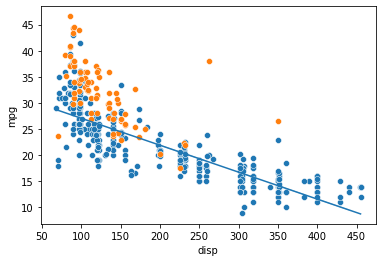

In [134]:
sns.scatterplot(x=trained_x.disp,y=trained_y)
#sns.scatterplot(x=trained_x.hpow,y=trained_y)
#sns.scatterplot(x=trained_x.weight,y=trained_y)
#sns.scatterplot(x=trained_x.acc,y=trained_y)
sns.scatterplot(x=test_x.disp,y=test_y)
#sns.scatterplot(x=test_x.hpow,y=test_y)
#sns.scatterplot(x=test_x.weight,y=test_y)
#sns.scatterplot(x=test_x.acc,y=test_y)
sns.lineplot(x=trained_x.disp,y=predvaldisp)

In [136]:
modelhpow=sm.OLS(trained_y,trained_hpow).fit()
modelhpow.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     521.9
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           6.96e-69
Time:                        14:46:18   Log-Likelihood:                -900.19
No. Observations:                 318   AIC:                             1804.
Df Residuals:                     316   BIC:                             1812.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.9975      0.680     52.930      0.000      34.659      37.336
hpow          -0.1326      0.006    -22.844      0.000      -0.144      -0.121
==============================================================================
Omnibus:                       23.280   Durbin-Watson:                   0.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.496
Skew:                           0.611   Prob(JB):                     1.07e-06
Kurtosis:                       3.762   Cond. No.                         345.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
predvalhpow=modelhpow.predict(trained_hpow)

<AxesSubplot:xlabel='hpow', ylabel='mpg'>

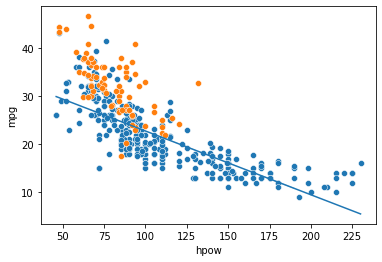

In [138]:
sns.scatterplot(x=trained_x.hpow,y=trained_y)
sns.scatterplot(x=test_x.hpow,y=test_y)
sns.lineplot(x=trained_x.hpow,y=predvalhpow)

In [111]:
pearsonr(trained_x.weight,trained_y)

(-0.8673223828523524, 9.285480331804833e-98)

In [139]:
modelweight=sm.OLS(trained_y,trained_weight).fit()
modelweight.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     959.5
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           9.29e-98
Time:                        14:46:59   Log-Likelihood:                -833.38
No. Observations:                 318   AIC:                             1671.
Df Residuals:                     316   BIC:                             1678.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.8490      0.687     60.943      0.000      40.498      43.200
weight        -0.0066      0.000    -30.975      0.000      -0.007      -0.006
==============================================================================
Omnibus:                       38.325   Durbin-Watson:                   0.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.881
Skew:                           0.655   Prob(JB):                     3.33e-17
Kurtosis:                       5.003   Cond. No.                     1.18e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [140]:
predvalweight=modelweight.predict(trained_weight)

<AxesSubplot:xlabel='weight', ylabel='mpg'>

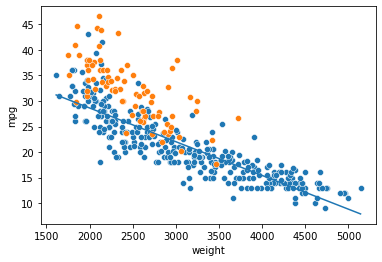

In [141]:
sns.scatterplot(x=trained_x.weight,y=trained_y)
sns.scatterplot(x=test_x.weight,y=test_y)
sns.lineplot(x=trained_x.weight,y=predvalweight)

In [110]:
pearsonr(auto.acc,auto.mpg)

(0.42028891210165054, 1.823091535078553e-18)

In [142]:
modelacc=sm.OLS(trained_y,trained_acc).fit()
modelacc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     67.66
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           5.12e-15
Time:                        14:47:30   Log-Likelihood:                -1024.4
No. Observations:                 318   AIC:                             2053.
Df Residuals:                     316   BIC:                             2060.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7368      1.933      2.969      0.003       1.935       9.539
acc            1.0215      0.124      8.226      0.000       0.777       1.266
==============================================================================
Omnibus:                       21.864   Durbin-Watson:                   0.764
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.675
Skew:                           0.678   Prob(JB):                     4.38e-06
Kurtosis:                       3.146   Cond. No.                         88.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
predvalacc=modelacc.predict(trained_acc)

<AxesSubplot:xlabel='acc', ylabel='mpg'>

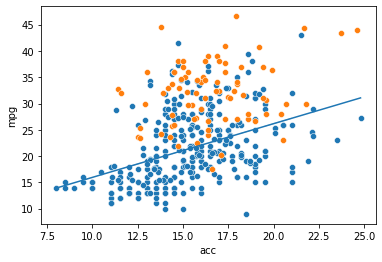

In [144]:
sns.scatterplot(x=trained_x.acc,y=trained_y)
sns.scatterplot(x=test_x.acc,y=test_y)
sns.lineplot(x=trained_x.acc,y=predvalacc)